# Статистика, DS-поток
## Практическое задание 3. Доверительные интервалы

In [191]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set(font_scale=1.5, style='whitegrid', palette='Set2')

In [27]:
alpha = 0.95

*Замечания.*
1. Вы должны помнить о разнице между доверительным интервалом и *реализацией* доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если интервал получен на лекции/семинаре, то нужно просто выписать его формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

______________
## Задача 1.

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения.

Чтобы не плодить код, напишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

In [89]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''
    n = left.shape[0]
    grid = np.arange(1, n+1)

    plt.scatter(grid, sample, alpha=0.5, color=color_sample, s=20, label='Выборка')
    plt.plot(grid, estimation, color=color_estimation, lw=2, label=label_estimation)
    plt.fill_between(grid, left, right, alpha=0.2, color=color_interval, 
                     label=f'Ассимптотический ДИ параметра {label_estimation}')
    plt.ylim(ylim)
    plt.xlabel('Размер выбоки, n')
    plt.legend(fontsize='x-small')
    

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную выше функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

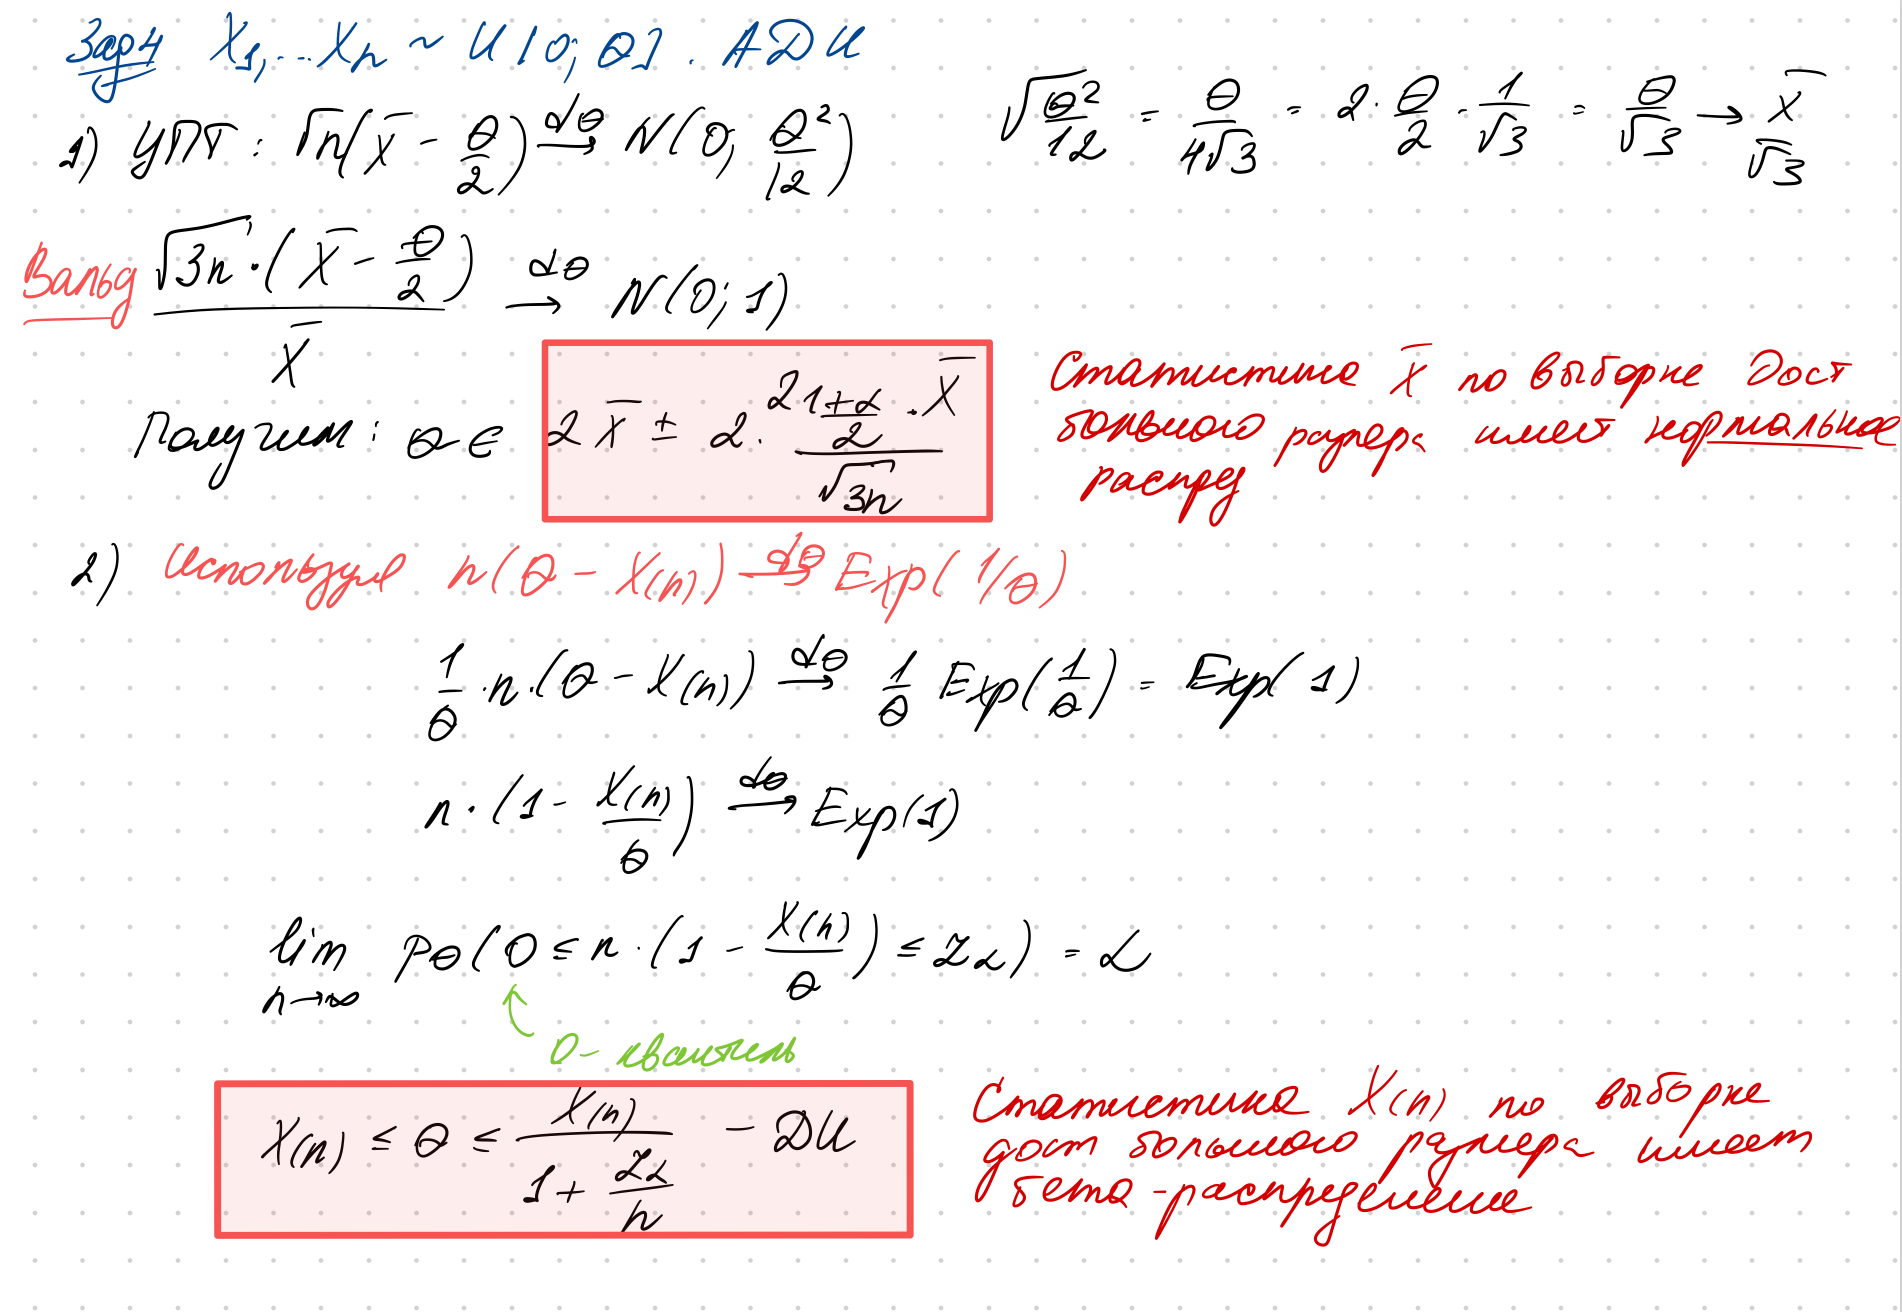

In [135]:
n = 100
sample = sps.uniform(loc=0, scale=1).rvs(n)

In [136]:
means = np.cumsum(sample) / np.arange(1, n+1)
estimations = 2*means
z = sps.norm().ppf((1 + alpha) / 2)

left_1 = estimations - 2*z*means / np.sqrt(3*np.arange(1, n+1))
right_1 = estimations + 2*z*means / np.sqrt(3*np.arange(1, n+1))

maxes = np.maximum.accumulate(sample)
z_alpha = sps.norm().ppf(alpha)
right_2 = maxes / (1 + (z_alpha / np.arange(1, n+1)))

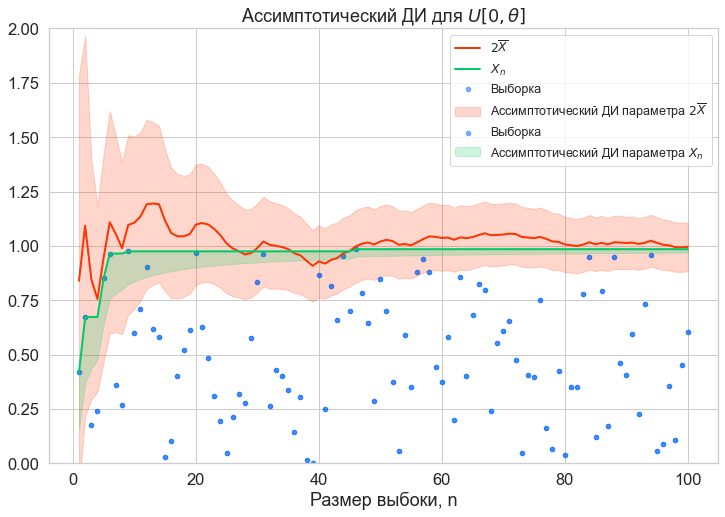

In [144]:
plt.figure(figsize=(12, 8))

draw_confidence_interval(left_1, right_1, estimations, sample, (0, 2), 
                         color_estimation='#FF3300', color_interval='#FF3300', 
                         label_estimation='$2\\overline{X}$')

draw_confidence_interval(maxes, right_2, maxes, sample, (0, 2),
                        color_estimation='#00CC66', color_interval='#00CC66', 
                        label_estimation='$X_{n}$')
plt.title('Ассимптотический ДИ для $U[0, \\theta]$');

**Вывод:** *В обоих случаях оценки лежат внутри ассимптотического доверительного интервала. Статистика $2\overline{X}$ дает более широкий ассимптотический доверительный интервал. Предполагаю, что на ширину влияет дисперсия оценки. У ${X_{(n)}}$ она меньше, и доверительный интервал получается уже.*

_________________
## Задача 2.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

1)

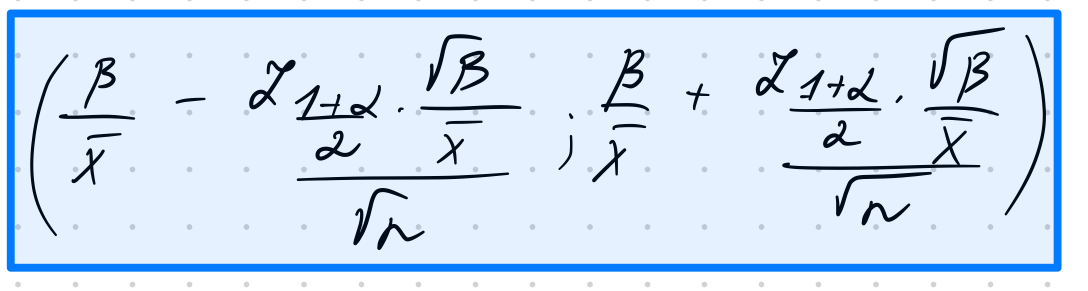

2) 

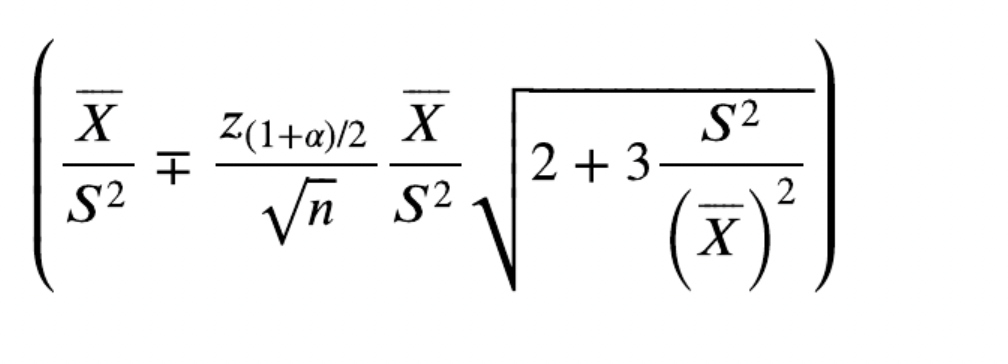

In [64]:
beta = 2
sample_gamma = sps.gamma(scale=1/3, a=beta).rvs(n)
means = np.cumsum(sample_gamma) / np.arange(1, n+1)
z = sps.norm().ppf((1 + alpha) / 2)

In [65]:
estimations_1 = beta / means
left_1 = estimations_1 - z*((np.sqrt(beta)/means) / np.sqrt(np.arange(1, n+1)))
right_1 = estimations_1 + z*((np.sqrt(beta)/means) / np.sqrt(np.arange(1, n+1)))

In [ ]:
gamma_vars = np.cumsum(sample_gamma**2)/np.arange(1, n+1) - means**2
estimations_2 = means / gamma_vars
factor = np.sqrt(2 + 3 * gamma_vars/ (means ** 2))


left_2 = estimations_2 - (z*factor*means) / (np.sqrt(np.arange(1, n+1))*gamma_vars)
right_2 = estimations_2 + (z*factor*means) / (np.sqrt(np.arange(1, n+1))*gamma_vars)

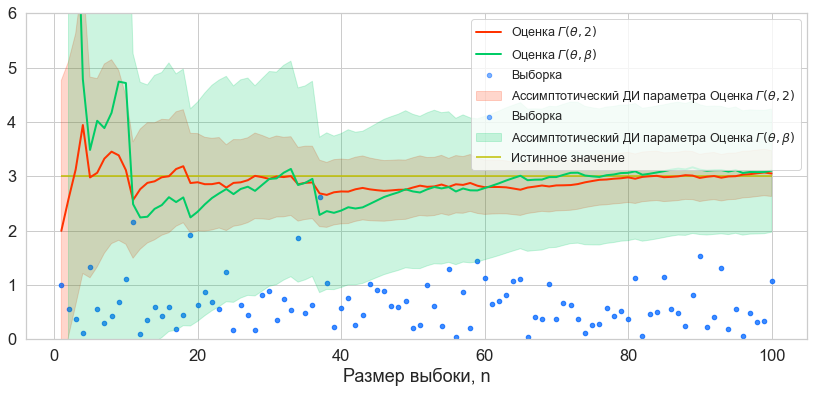

In [103]:
plt.figure(figsize=(14, 6))

draw_confidence_interval(left_1, right_1, estimations_1, sample_gamma, (0, 6), 
                         color_estimation='#FF3300', color_interval='#FF3300', 
                         color_sample='#0066FF', label_estimation='Оценка $Г(\\theta, 2)$')

draw_confidence_interval(left_2, right_2, estimations_2, sample_gamma, (0, 6),
                        color_estimation='#00CC66', color_interval='#00CC66', 
                         color_sample='#0066FF', label_estimation='Оценка $Г(\\theta, \\beta)$')

plt.hlines(3, 1, n, color='y', label='Истинное значение')

plt.legend(fontsize='x-small', loc=1);

Сравните полученные интервалы и поясните наблюдаемый эффект.

**Вывод:** *Так как во втором случае используется оценка, а не известное значение `beta`, то доверительный интервал получается шире. Но в обоих случаях с вероятностью 0.95 истинное значение попадает в доверительный интервал.*

__________________
## Задача 3.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: 1)

Точный доверительный интервал: 2)

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

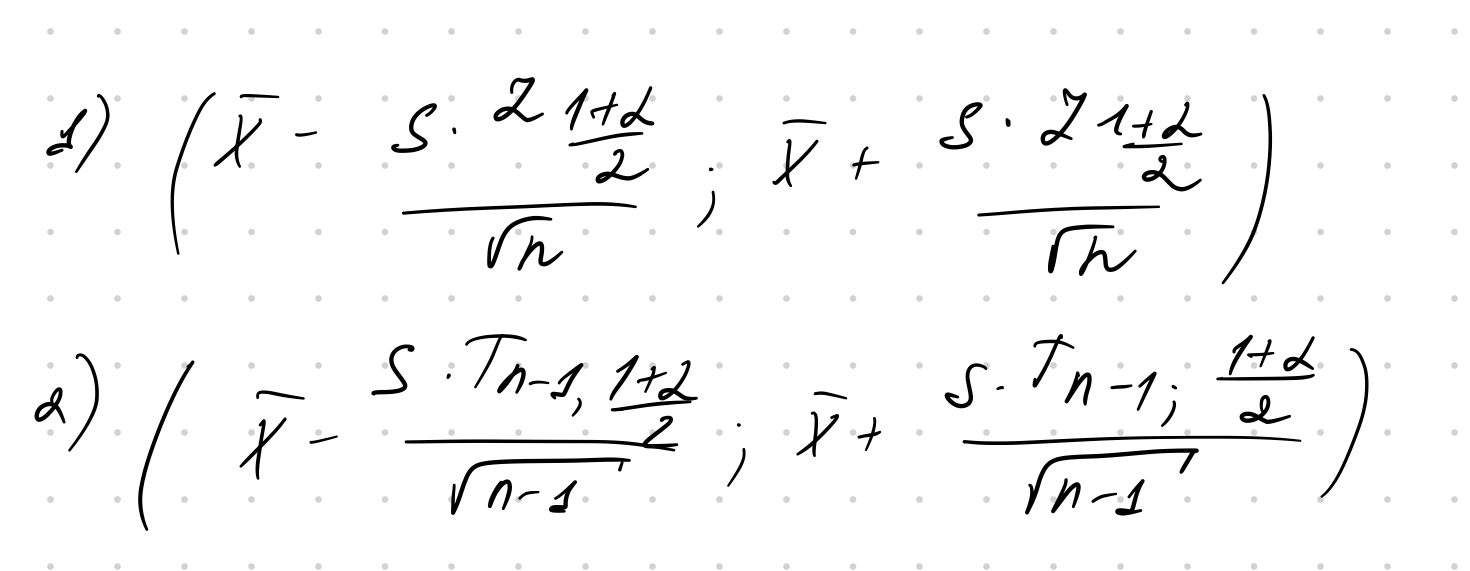

In [166]:
z = sps.norm().ppf((1 + alpha) / 2)

In [167]:
def calculate_asymptotic_confidence_interval(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
    Параметры:
    :param sample: выборка,
    :param alpha: уровень доверия
    :return: асимптотический доверительный интервал
    '''
    n = sample.shape[0]
    mean = sample.cumsum()[1:] / np.arange(2, n+1)
    s = np.sqrt(np.cumsum(sample**2)[1:] / np.arange(2, n+1) - mean**2)

    left = mean -  s / (np.arange(2, n+1)**0.5) * z
    right = mean + s / (np.arange(2, n+1)**0.5) * z
    return np.array([left, right])

def calculate_confidence_interval(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
    :param sample: выборка,
    :param alpha: уровень доверия
    :return: неасимптотический доверительный интервал
    '''
    n = sample.shape[0]
    mean = sample.cumsum()[1:] / np.arange(2, n+1)
    s = np.sqrt(np.cumsum(sample**2)[1:] / np.arange(2, n+1) - mean**2)
    t = sps.t(df=np.arange(n)).ppf((1 + alpha) / 2)
    shift = t[1:] * s / (np.sqrt(np.arange(1, n)))
    left = mean - shift
    right = mean + shift
    return np.array([left, right])

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

In [168]:
sample = sps.norm(0, 1).rvs(size=30)
asympt_left, asympt_right = calculate_asymptotic_confidence_interval(sample, alpha)
precise_left, precise_right = calculate_confidence_interval(sample, alpha)
means = sample.cumsum()[1:] /np.arange(2, len(sample)+1)

In [182]:
def draw_confidence_interval_subplot(
    left,
    right,
    estimation=None,
    sample=None,
    ylim=(None, None),
    estim_label='',
    sample_label='',
    color=None,
    interval_label=None
    ):
    '''
    Функция для отображения на графике доверительного интервала

    :param left: левая границы интервала,
    :param right: правая границы интервала,
    :paramestimation: точечные оценки величины,
    :param sample: выборка,
    :param estim_label: подпись к оценке,
    :param sample_label: подпись к выборке,
    :param ylim: ограничение на ось y,
    :param color: цвет, которым будет изображен дов. интервал,
    :param interval_label: подпись к доверительному интервалу.
    '''
    plt.scatter(np.arange(len(sample)), sample,
                alpha=0.4, s=40, label=sample_label)

    if not (estimation is None):
        plt.plot(1+np.arange(len(left)), estimation,
                linewidth=2.5, label=estim_label,
                color=color)

    if interval_label is None:
        interval_label = u'доверительный интервал'
    
    plt.fill_between(1+np.arange(len(left)), left, right,
        alpha=0.25, label=interval_label, color=color)
    plt.legend()

In [173]:
sample = sps.norm(0, 1).rvs(size=30)

asympt_left, asympt_right = calculate_asymptotic_confidence_interval(
    sample, alpha
)
precise_left, precise_right = calculate_confidence_interval(
    sample, alpha
)

means = sample.cumsum()[1:] / np.arange(2, len(sample)+1)

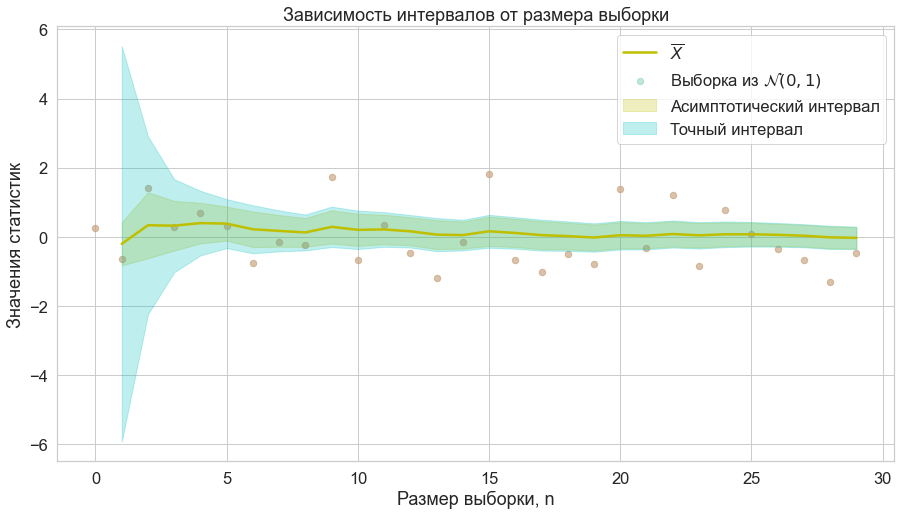

In [188]:
plt.figure(figsize=(15, 8))

draw_confidence_interval_subplot(asympt_left, asympt_right, means,
    sample, estim_label='$\\overline{X}$',
    sample_label='Выборка из $\\mathcal{N}(0, 1)$',
    interval_label='Асимптотический интервал',
    color='y'
)

draw_confidence_interval_subplot(precise_left, precise_right, None,
    sample, estim_label=None,
    sample_label=None,
    interval_label='Точный интервал',
    color='c'
)

plt.xlabel('Размер выборки, n')
plt.ylabel('Значения статистик')
plt.legend()
plt.title('Зависимость интервалов от размера выборки');

**Вывод:** *Эксперимент показывает, что с ростом размера выборки оба типа интервалов становятся все более похожи друг на друга. По графику видно, что даже при небольшом размере выборки они практически совпадают.*

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [235]:
data_wine = pd.read_csv('./wine.data', header=None, names=[
    'Class', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 
    'Nonflavanoid phenols','Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines',
    'Proline'
])
features_of_int = ['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']
data_wine = data_wine[features_of_int][data_wine['Class'] == 1]

In [228]:
asymt_intervals = []
prec_intervals = []

for feature in data_wine.values.T:
    interval_asympt = calculate_asymptotic_confidence_interval(feature)
    interval_precise = calculate_confidence_interval(feature)
    asymt_intervals.append([interval_asympt[0][-1], interval_asympt[1][-1]])
    prec_intervals.append([interval_precise[0][-1], interval_precise[1][-1]])    

In [236]:
res_columns = ['Асимтотический доверительный интервал', 'Точный доверительный интервал']
res = pd.DataFrame(columns=res_columns, index=features_of_int)
res['Асимтотический доверительный интервал'] = asymt_intervals
res['Точный доверительный интервал'] = prec_intervals
res

,Асимтотический доверительный интервал,Точный доверительный интервал
Alcalinity of ash,"[16.39308404854733, 17.681492222639115]","[16.373712890507765, 17.70086338067868]"
Nonflavanoid phenols,"[0.2722779675575977, 0.30772203244240226]","[0.2717450676612337, 0.3082549323387663]"
Proanthocyanins,"[1.7950609069670673, 2.003583160829544]","[1.7919257844060954, 2.0067182833905157]"
Hue,"[1.0325644988159342, 1.0915032977942354]","[1.0316783566657763, 1.0923894399443932]"


**Вывод:** *Исследование на случайной выборке и на wine dataset показало, что с ростом размера выборки точный доверительный интервал (центральный, неассимптотический) становится все более похожим на ассимптотический доверительный интервал.*

__________________
## Задача 4. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

In [112]:
sizes = [5, 20, 50]
colors = ['r', 'y','b']
z = sps.norm().ppf((1 + np.sqrt(alpha)) / 2)

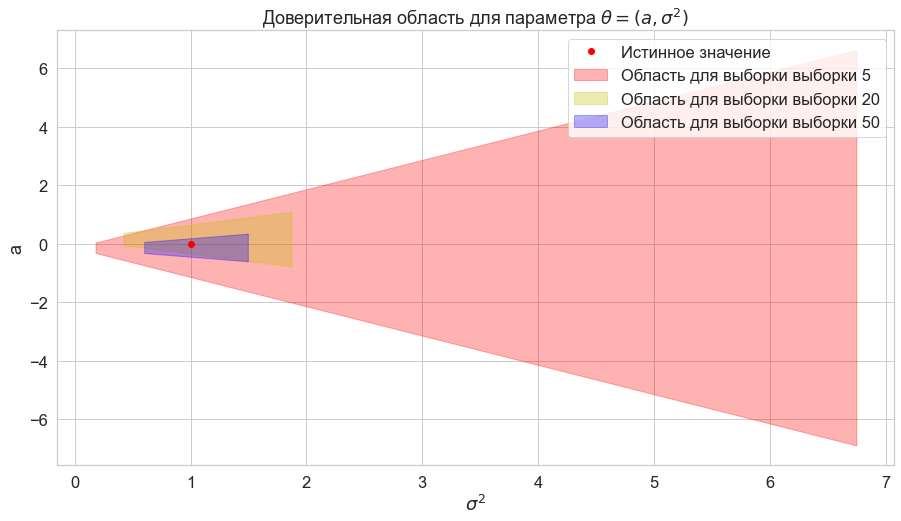

In [119]:
plt.figure(figsize=(15, 8))

for i in range(3):    
    n = sizes[i]
    sample = sps.norm().rvs(n)
    mean = sample.mean()
    S2 = (sample**2).mean() - mean**2
    b1 = sps.chi2(n - 1).ppf((1 - np.sqrt(alpha)) / 2)
    b2 = sps.chi2(n - 1).ppf((1 + np.sqrt(alpha)) / 2)
    border1 = ((n-1) * S2) / b2
    border2 = ((n-1) * S2) / b1
    sigma_interval = np.linspace(border1, border2, 1000)
    left = mean - sigma_interval * z / np.sqrt(n)
    right = mean + sigma_interval * z / np.sqrt(n)

    plt.fill_between(sigma_interval, left, right, alpha=0.3, color=colors[i], label=f'Область для выборки выборки {n}')
 
plt.plot(1, 0, 'ro', label='Истинное значение')
plt.title('Доверительная область для параметра $\\theta = (a, \\sigma^2)$')
plt.xlabel('$\\sigma^2$')
plt.ylabel('a')
plt.legend();

**Вывод:** *Построение подтверждает результаты полученные теоретически: во всех случаях истинное значение параметра (0, 1) лежит внутри области. Независимо от размера выборки, получили области, в которых параметр лежит с вероятностью 95%*